# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_json = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city = city_weather_json["name"] 
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
            
        city_data.append({"Name": city,
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | sal rei
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | poum
Processing Record 5 of Set 1 | aksarka
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | tadine
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | itoman
Processing Record 16 of Set 1 | bababe
City not found. Skipping...
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | najran
Processing Record 19 of Set 1 | namatanai
Processing Record 20 of Set 1 | nome
Processing Record 21 of Set 1 | necochea
Processing Record 22 of Set 1 | bengku

Processing Record 38 of Set 4 | leningradskiy
Processing Record 39 of Set 4 | nichinan
Processing Record 40 of Set 4 | esperance
Processing Record 41 of Set 4 | nazarovo
Processing Record 42 of Set 4 | fossano
Processing Record 43 of Set 4 | marystown
Processing Record 44 of Set 4 | rawson
Processing Record 45 of Set 4 | santa maria
Processing Record 46 of Set 4 | hohhot
Processing Record 47 of Set 4 | atambua
Processing Record 48 of Set 4 | cherskiy
Processing Record 49 of Set 4 | ponta do sol
Processing Record 0 of Set 5 | tres palos
Processing Record 1 of Set 5 | mullaitivu
City not found. Skipping...
Processing Record 2 of Set 5 | mahebourg
Processing Record 3 of Set 5 | imeni poliny osipenko
Processing Record 4 of Set 5 | lavara
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | tarko-sale
Processing Record 7 of Set 5 | barawe
City not found. Skipping...
Processing Record 8 of Set 5 | saskylakh
Processing Record 9 of Set 5 | ca mau
Processing Record 10 of Set 5 

Processing Record 25 of Set 8 | port-gentil
Processing Record 26 of Set 8 | russell
Processing Record 27 of Set 8 | san quintin
Processing Record 28 of Set 8 | kodinsk
Processing Record 29 of Set 8 | lakatoro
Processing Record 30 of Set 8 | fomboni
Processing Record 31 of Set 8 | seoul
Processing Record 32 of Set 8 | valparaiso
Processing Record 33 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 34 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 35 of Set 8 | santo amaro
Processing Record 36 of Set 8 | puquio
Processing Record 37 of Set 8 | walvis bay
Processing Record 38 of Set 8 | ojuelos de jalisco
Processing Record 39 of Set 8 | coquimbo
Processing Record 40 of Set 8 | primalkinskoye
Processing Record 41 of Set 8 | kalashnikovo
Processing Record 42 of Set 8 | nelson bay
Processing Record 43 of Set 8 | chuy
Processing Record 44 of Set 8 | kuytun
Processing Record 45 of Set 8 | biu
Processing Record 46 of Set 8 | eureka
Processing Record 47 of Set

Processing Record 13 of Set 12 | tidore
City not found. Skipping...
Processing Record 14 of Set 12 | naica
Processing Record 15 of Set 12 | trani
Processing Record 16 of Set 12 | port lincoln
Processing Record 17 of Set 12 | chunskiy
Processing Record 18 of Set 12 | saint-joseph
Processing Record 19 of Set 12 | papar
Processing Record 20 of Set 12 | petropavl
Processing Record 21 of Set 12 | artyk
City not found. Skipping...
Processing Record 22 of Set 12 | padang
Processing Record 23 of Set 12 | dunn
Processing Record 24 of Set 12 | kyaiklat
Processing Record 25 of Set 12 | nago
Processing Record 26 of Set 12 | chitipa
Processing Record 27 of Set 12 | buariki
City not found. Skipping...
Processing Record 28 of Set 12 | montecristi
Processing Record 29 of Set 12 | wahiawa
Processing Record 30 of Set 12 | bauchi
Processing Record 31 of Set 12 | maracacume
Processing Record 32 of Set 12 | belmonte
Processing Record 33 of Set 12 | haaksbergen
Processing Record 34 of Set 12 | shirakawa
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Name          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,20.06,37,0,12.35,CL,1675361743
1,Sal Rei,16.1833,-22.9167,23.11,60,40,9.77,CV,1675361743
2,Cape Town,-33.9258,18.4232,20.75,63,0,7.72,ZA,1675361700
3,Poum,-20.2333,164.0167,27.26,73,97,7.64,NC,1675361744
4,Aksarka,66.5606,67.7975,-14.72,96,34,3.62,RU,1675361744


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Punta Arenas,-53.1500,-70.9167,20.06,37,0,12.35,CL,1675361743
1,Sal Rei,16.1833,-22.9167,23.11,60,40,9.77,CV,1675361743
2,Cape Town,-33.9258,18.4232,20.75,63,0,7.72,ZA,1675361700
3,Poum,-20.2333,164.0167,27.26,73,97,7.64,NC,1675361744
4,Aksarka,66.5606,67.7975,-14.72,96,34,3.62,RU,1675361744


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

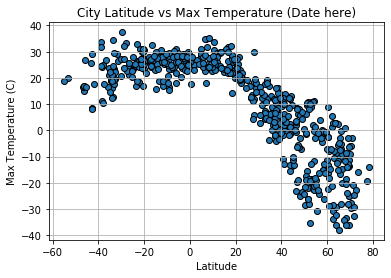

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("City Latitude vs Max Temperature (Date here)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

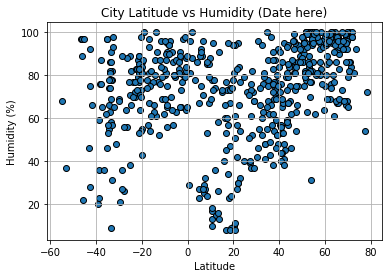

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title("City Latitude vs Humidity (Date here)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

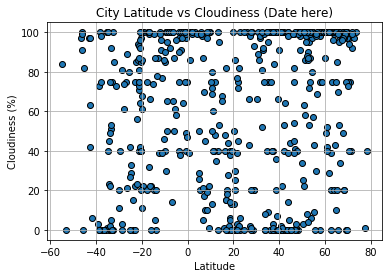

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title("City Latitude vs Cloudiness (Date here)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

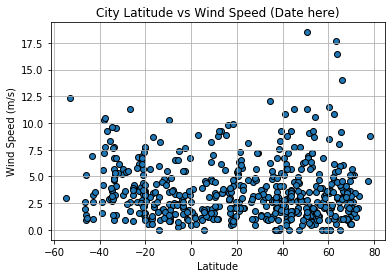

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.title("City Latitude vs Wind Speed (Date here)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots

def liner_regression(x_values, y_values):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(0.1, 0.9), xycoords='axes fraction', fontsize=15,color="red")
#     plt.xlabel ("Latitude")
#     plt.ylabel ("xxxx")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0),:]

# Display sample data

northern_hemi_df.head()

,Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Sal Rei,16.1833,-22.9167,23.11,60,40,9.77,CV,1675361743
4,Aksarka,66.5606,67.7975,-14.72,96,34,3.62,RU,1675361744
6,Chokurdakh,70.6333,147.9167,-27.86,100,97,2.60,RU,1675361745
7,Bilibino,68.0546,166.4372,-18.42,96,100,0.90,RU,1675361746
11,Barrow,71.2906,-156.7887,-20.99,84,40,5.14,US,1675361748


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0),:]

# Display sample data

southern_hemi_df.head()

,Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Punta Arenas,-53.1500,-70.9167,20.06,37,0,12.35,CL,1675361743
2,Cape Town,-33.9258,18.4232,20.75,63,0,7.72,ZA,1675361700
3,Poum,-20.2333,164.0167,27.26,73,97,7.64,NC,1675361744
5,Tadine,-21.5500,167.8833,25.55,87,94,2.75,NC,1675361745
8,East London,-33.0153,27.9116,23.52,78,75,4.12,ZA,1675361746


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7210420178052294


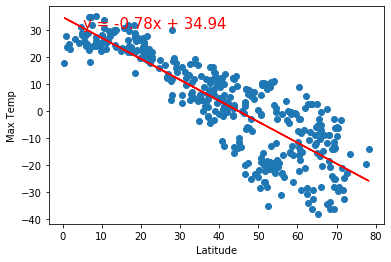

In [31]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.xlabel ("Latitude")
plt.ylabel ("Max Temp")

liner_regression(x_values, y_values)

The r-squared is: 0.1412839650645693


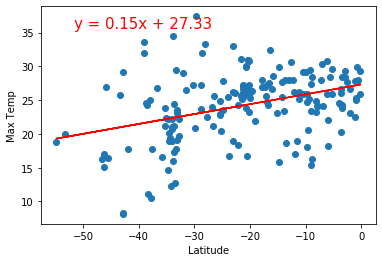

In [32]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.xlabel ("Latitude")
plt.ylabel ("Max Temp")

liner_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.27263254501632467


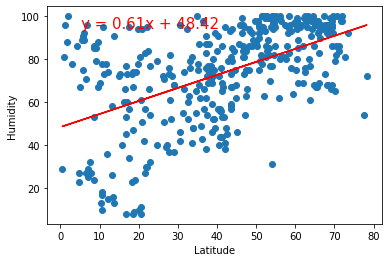

In [33]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.xlabel ("Latitude")
plt.ylabel ("Humidity")

liner_regression(x_values, y_values)

The r-squared is: 0.09762326594833644


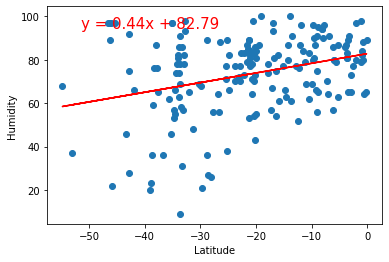

In [34]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.xlabel ("Latitude")
plt.ylabel ("Humidity")

liner_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.06383287299882644


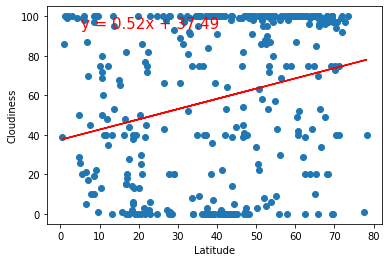

In [35]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness")

liner_regression(x_values, y_values)

The r-squared is: 0.10886120943634349


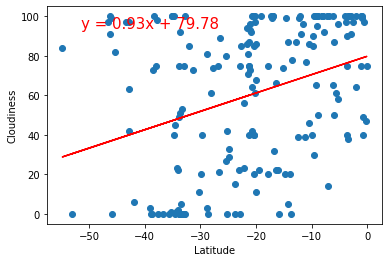

In [36]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness")

liner_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0010702158178861757


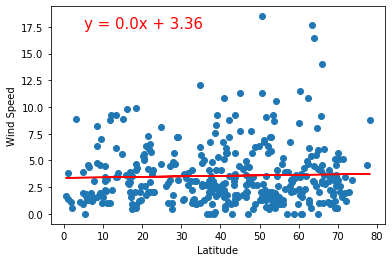

In [38]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed")

liner_regression(x_values, y_values)

The r-squared is: 0.07116258921421649


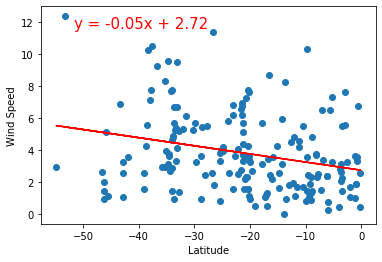

In [37]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed")

liner_regression(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE